## This is a replication test for the Ich values and the fitness of the regression model

First we import pachages and define the presentation style

In [2]:
#import packages, define figures style
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from skbio.diversity.alpha import gini_index, shannon, pielou_e, simpson
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_partregress
import seaborn as sns
plt.style.use('ggplot')

Next we generate the data, measure indexes and replicate the entire procedure all in one two-folded loop

In [4]:
"This is the major simulation block, which tests robustness of the fit"
Ich_data,Gin_data,Sim_data,Shi_data, Pie_data=[],[],[],[],[]
res_ols, res_gls, res_Shas, res_Sha=[],[],[],[]
for n in range(50): #careful with big numbers, it can be slow
    if n%10==0:
        print(n)
    for i in range(50,500,25): 
        for j in range(1,21):
            x=np.random.beta(21-j,j, size=i)
            xn=x/sum(x)
            Xch=[x for x in xn if x>0.005]
            Ich=sum(Xch)
            Ich_data.append(Ich) #the final Ch index
            Gin=gini_index(x)
            Gin_data.append(Gin)
            Sim=simpson(x)
            Sim_data.append(Sim)
            Shi_data.append(shannon(x))
            Pie=pielou_e(x)
            Pie_data.append(Pie)       
    df = pd.DataFrame(data=[Ich_data, Gin_data, Pie_data, Shi_data, Sim_data]).T
    df.columns=["CH", "Gini", "Pielou", "Shannon", "Simpson"]
    results = smf.ols('CH ~ Shannon+ Simpson+ Gini + Pielou', data=df).fit()
    resShaS=smf.ols('CH ~ Shannon+Simpson', data=df).fit()
    resSh=smf.ols('CH ~ Shannon', data=df).fit()
    resgls = smf.gls('CH ~ Shannon+ Simpson+ Gini + Pielou', data=df).fit()
    res_ols.append(results.rsquared)
    res_gls.append(resgls.rsquared)
    res_Shas.append(resShaS.rsquared)
    res_Sha.append(resSh.rsquared)
print("finished")

0
10
20
30
40
finished


All data are collected. Now we can generate a plot. First we convert data into a data frame and show it as an seaborn boxplot

In [10]:
sum_df=pd.DataFrame(data=[res_ols,res_gls, res_Shas, res_Sha]).T 
sum_df.columns=["R2 full OLS", "R2 full GLS","R2 Shann+Simp", "R2 Shannon"]
sum_df.describe 

<bound method NDFrame.describe of     R2 full OLS  R2 full GLS  R2 Shann+Simp  R2 Shannon
0      0.879949     0.879949       0.872056    0.825883
1      0.882356     0.882356       0.875147    0.827715
2      0.883745     0.883745       0.876532    0.828099
3      0.883823     0.883823       0.876697    0.828409
4      0.884520     0.884520       0.877640    0.828849
5      0.884819     0.884819       0.878039    0.828656
6      0.884937     0.884937       0.878243    0.828477
7      0.885077     0.885077       0.878417    0.828564
8      0.885362     0.885362       0.878693    0.828656
9      0.885624     0.885624       0.878901    0.828580
10     0.885873     0.885873       0.879253    0.828734
11     0.886030     0.886030       0.879495    0.828911
12     0.886024     0.886024       0.879495    0.828904
13     0.886149     0.886149       0.879674    0.828988
14     0.886156     0.886156       0.879691    0.828935
15     0.886263     0.886263       0.879732    0.828978
16     0.88632

Show as a seaborn boxplot

Text(0.5, 1.0, 'Replication of the R-squared using 4 different regression models')

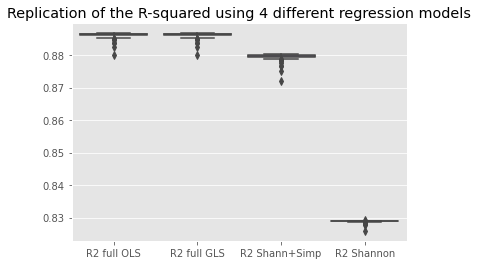

In [11]:
sns.boxplot(data=sum_df)
plt.title("Replication of the R-squared using 4 different regression models")

This barely changes